<center>
    <h1>Работа 5.2.1</h1>
    <h2>Опыт Франка-Герца</h2>
</center>
<br>
<hr>
<br>
<br>
<br>
<br>
<br>
<p style="text-align:right">
    Работу выполнил<br>
    студент группы Б02-012н<br>
    <b>Захаров Лев</b><br>
    Преподаватель:<br>
    <b>Светличный Александр Олегович</b><br>
</p>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<hr>
<p style="text-align:center">
    Долгопрудный 2022
</p>
<hr>

<h2>1. Аннотация</h2>
<hr>
<br>
<p style="text-align:justify">
    В работе повторяется опыт Франка-Герца, исследуется дискретность уровней энергии атомов гелия. Определяется энергия возбуждения первого уровня атома $He$ в двух режимах работы установки
<p>

<h2>2. Теоретическое введение</h2>
<hr>
<br>
<p style="text-align:justify">
    Одним из простых экспериментов, подтверждающих существование дискретных уровней энергии атомов, является опыт Франка и Герца
</p>
<p style="text-align:justify">
    При похождении электронов через разреженный гелий, они взаимодействуют с молекулами газа. Если энергии достаточно для ионизации гелия, то происходят неупругие столкновения, в результате которых энергия электронов уменьшается. Из-за этого на ВАХ лампы, заполненной газом, наблюдаются экстремумы. По точкам этих экстремумов можно оценить энергию возбуждения гелия
</p>

<h2>3. Экспериментальная установка</h2>
<hr>
<br>
<p style="text-align:justify">
    Схематическое изображение установки приведены на рис. 1a.
</p>
<p style="text-align:right">
    <img src=" 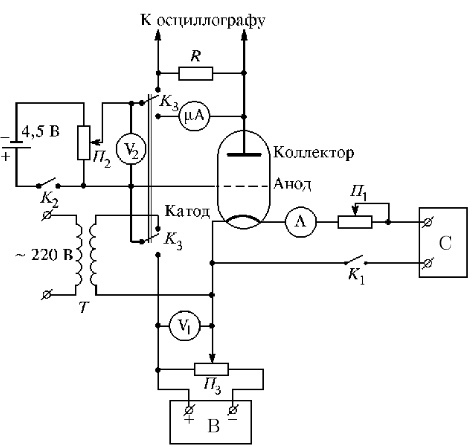" title="Рис.1 Экспериментальная установка."/>
    Рис.1 Экспериментальная установка.
</p>
<p style="text-align:justify">
    Для опыта используется лампа ЛМ-2, заполненная гелием до давления ≃ 1 Тор. Источником электронов является катод, нагреваемый переменным током. Напряжение накала подается от источника питания Б7-4. Ток накала контролируется амперметром А. Источник Б7-4 включается в цепь тумблером K1
</p>
<p style="text-align:justify">
    Ускоряющее напряжение подается на анод от выпрямителя Б5-10. Величина этого напряжения регулируется потенциометром П3 и измеряется вольтметром V1. Источник задерживающего потенциала — батарея 4,5 В — включается ключом K2, величина потенциала регулируется потенциометром П2 и измеряется вольтметром V2. Ток в цепи коллектора регистрируется микроамперметром
</p>
<p style="text-align:justify">
    Схему можно переключать из статического режима измерений в динамический режим с помощью ключа K3. При динамическом режиме работы ускоряющий потенциал подается с понижающего трансформатора T, а ток коллектора регистрируется осциллографом, подключенным к нагрузочному резистору R
</p>

<h2>4. Исследование ВАХ установки</h2>
<hr>
<br>

In [1]:
# Подключение необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

<h4>4.1 ВАХ динамического режима</h4>
<hr>
<br>

<p style="text-align:justify">
    Динамический режим работы предложено исследовать при помощи осциллографа. На экране осциллографа получена вольт-амперная характеристика при разных величинах задерживающего напряжения. Пример ВАХ представлен на рисунке 2, измеренные данные по установке - в таблице 1
</p>
<p style="text-align:right">
    <img src=" 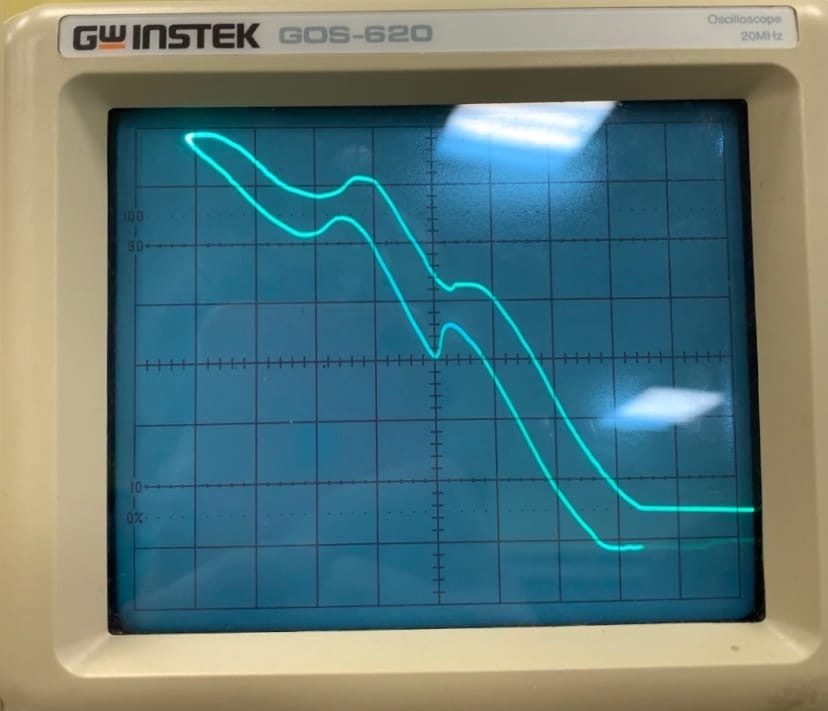" title="Рис.2 ВАХ на экране осциллографа."/>
    Рис.2 ВАХ на экране осциллографа
</p>

In [2]:
data_dynamic = pd.read_csv("Data\data_Dynamic.csv", dtype = {'U':int, 'min':np.float64, 'max':np.float64}, decimal = ',')

# Значение volts/div
X = 5 
Y = 1e-2

# Погрешность измерения в делениях
dX = 0.2
dY = 0.2

d = {
    'Задерживающее напряжение, В': data_dynamic['U'],
    'Δmin, дел': data_dynamic['min'],
    'ΔW по минимумам, эВ': X * data_dynamic['min'],
    'Δmax, дел': data_dynamic['max'],
    'ΔW по максимумам, эВ': X * data_dynamic['max'],
}
df = pd.DataFrame(data = d)

display(df)

,"Задерживающее напряжение, В","Δmin, дел","ΔW по минимумам, эВ","Δmax, дел","ΔW по максимумам, эВ"
0,4,3.5,17.5,2.9,14.5
1,4,3.4,17.0,2.6,13.0
2,6,3.6,18.0,3.0,15.0
3,6,3.5,17.5,2.6,13.0
4,8,3.9,19.5,3.0,15.0
5,8,3.5,17.5,2.6,13.0


<p style="text-align:right">
    Таблица 1. Данные ВАХ динамического режима
</p>

In [3]:
W4 = X * (sum(data_dynamic['min'][0:2]) + sum(data_dynamic['max'][0:2]))/4
W6 = X * (sum(data_dynamic['min'][2:4]) + sum(data_dynamic['max'][2:4]))/4
W8 = X * (sum(data_dynamic['min'][4:6]) + sum(data_dynamic['max'][4:6]))/4
dW = X * (2*dX)/2

δ4 = dW / W4
δ6 = dW / W6
δ8 = dW / W8

print("Энергия возбуждения первого уровня для:")
print("- задерживающего напряжения 4 В: W = %3.1f ± %2.1f эВ, δW = %3.2f;" % (W4, dW, δ4) )
print("- задерживающего напряжения 6 В: W = %3.1f ± %2.1f эВ, δW = %3.2f;" % (W6, dW, δ6) )
print("- задерживающего напряжения 8 В: W = %3.1f ± %2.1f эВ, δW = %3.2f." % (W8, dW, δ8) )

Энергия возбуждения первого уровня для:
- задерживающего напряжения 4 В: W = 15.5 ± 1.0 эВ, δW = 0.06;
- задерживающего напряжения 6 В: W = 15.9 ± 1.0 эВ, δW = 0.06;
- задерживающего напряжения 8 В: W = 16.2 ± 1.0 эВ, δW = 0.06.


<h4>4.2 ВАХ статического режима</h4>
<hr>
<br>

<p style="text-align:justify">
    ВАХ статического режима получен прямым измерением силы тока и напряжения. Сначала были проведены грубые измерения для определения точек, в которых будут наблюдаться экстремумы. Затем в их окрестностях были проведены более точные измерения. Результаты измерений представлены на графиках 1-3 ниже
</p>

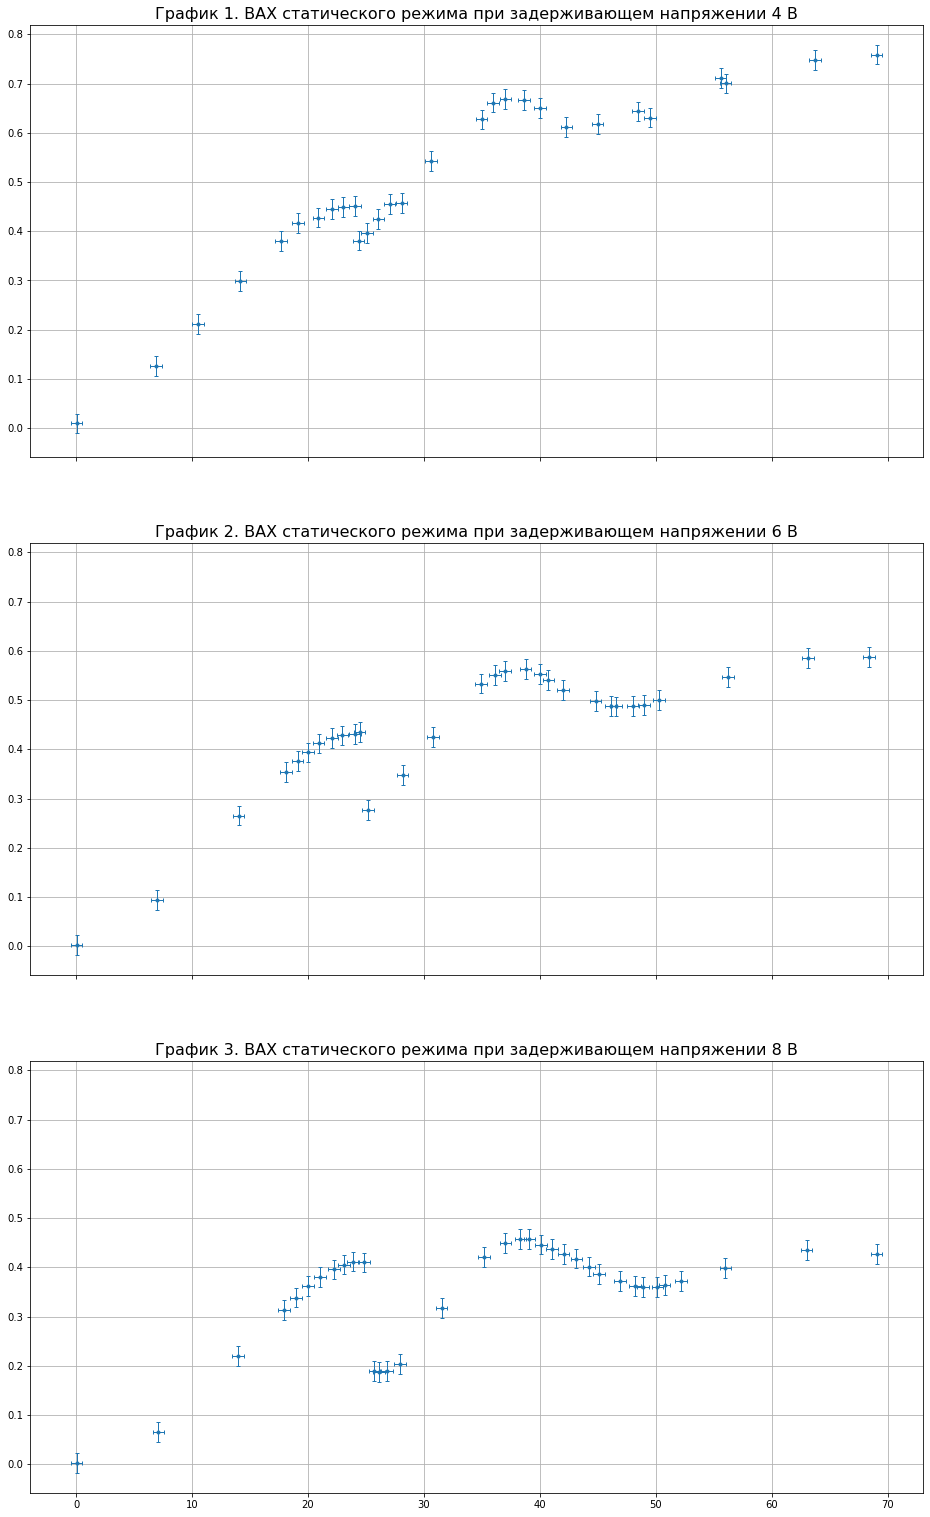

In [73]:
raw_data_4V = pd.read_csv("Data\data_Static_4V.csv", dtype = {'U':np.float64, 'I':np.float64}, decimal = ',')
raw_data_6V = pd.read_csv("Data\data_Static_6V.csv", dtype = {'U':np.float64, 'I':np.float64}, decimal = ',')
raw_data_8V = pd.read_csv("Data\data_Static_8V.csv", dtype = {'U':np.float64, 'I':np.float64}, decimal = ',')

data_4V = raw_data_4V.sort_values('U')
data_6V = raw_data_6V.sort_values('U')
data_8V = raw_data_8V.sort_values('U')

dx = 0.5
dy = 0.02

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, sharey = True, figsize = (16, 27))
ax1.grid(visible=1, which='both', axis='both')
ax2.grid(visible=1, which='both', axis='both')
ax3.grid(visible=1, which='both', axis='both')
ax1.set_title("График 1. ВАХ статического режима при задерживающем напряжении 4 В", fontsize = 16)
ax1.errorbar(data_4V['U'], data_4V['I'], yerr = dy, xerr = dx, fmt=".", elinewidth=1.0, capsize = 2)
ax2.set_title("График 2. ВАХ статического режима при задерживающем напряжении 6 В", fontsize = 16)
ax2.errorbar(data_6V['U'], data_6V['I'], yerr = dy, xerr = dx, fmt=".", elinewidth=1.0, capsize = 2)
ax3.set_title("График 3. ВАХ статического режима при задерживающем напряжении 8 В", fontsize = 16)
ax3.errorbar(data_8V['U'], data_8V['I'], yerr = dy, xerr = dx, fmt=".", elinewidth=1.0, capsize = 2)

plt.show()

<p style="text-align:justify">
    По графикам определим энергию возбуждения первого уровня
</p>
<p style="text-align:center">
    \begin{equation}
        W_4 = 18,2 \pm 1,4 эВ;
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        W_6 = 21,7 \pm 3,5 эВ;
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        W_8 = 22,3 \pm 3,5 эВ;
    \end{equation}
</p>
<p style="text-align:justify">
    Итоговая энергия возбуждения первого уровня
</p>
<p style="text-align:center">
    \begin{equation}
        W = 20,7 \pm 3,5 эВ;
    \end{equation}
</p>
<p style="text-align:justify">
    Результаты измерений, полученные в статическом и динамическом режимах, совпадают в пределах погрешностей. Табличное значение $W_{табл} = 19.82 эВ$, что совпадает в пределах погрешности с динамическим режимом. 
</p>

<h2>5. Вывод</h2>
<hr>
<br>

<p style="text-align:justify">
    В ходе работы наблюдалась дискретность уровней энергии. Определена энергия возбуждения первого уровня:
</p>
<p style="text-align:center">
    \begin{equation}
        W_{4V} = 16,9 \pm 1,7 эВ
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        W_{6V} = 18,8 \pm 3,2 эВ
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        W_{8V} = 19,3 \pm 3,2 эВ
    \end{equation}
</p>
<p style="text-align:justify">
    Заметно, что энергия возбуждения первого уровня практически не зависит от задерживающего напряжения в пределах погрешности
</p>